In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
#subplots
# - 다수의 그래프를 하나의 창에 나누어 그리는데 사용 
# >> 개별적으로 조절 가능한 축 >> 'ax'

tips=sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


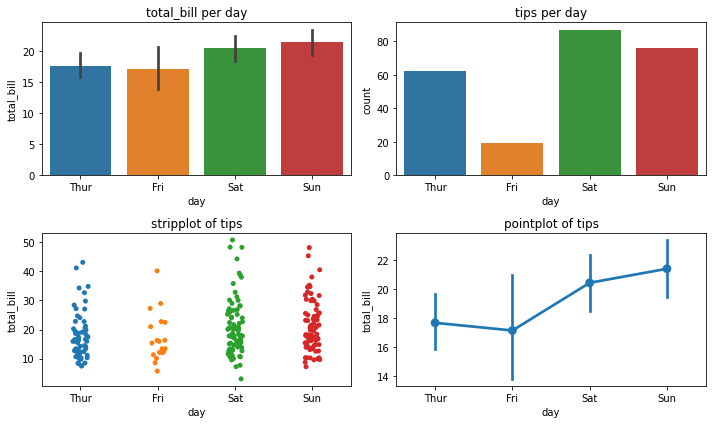

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

#요일별 총 청구 금액 시각화 
sns.barplot(x='day', y='total_bill', data=tips, ax = ax[0,0])
ax[0,0].set_title('total_bill per day')

sns.countplot(x='day', data=tips, ax= ax[0,1])
ax[0,1].set_title('tips per day')

sns.stripplot(x="day", y='total_bill', data=tips, ax=ax[1,0])
ax[1,0].set_title('stripplot of tips')

sns.pointplot(x='day', y='total_bill', data=tips,ax=ax[1,1])
ax[1,1].set_title('pointplot of tips')

plt.tight_layout()
plt.show()

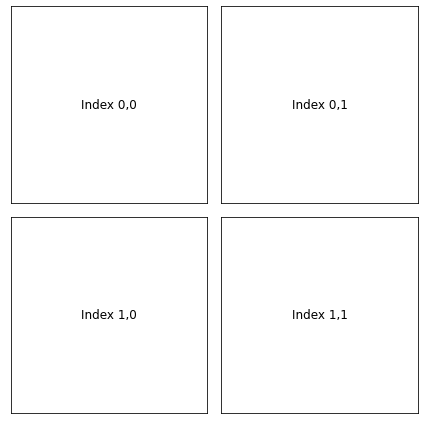

In [4]:
nrows, ncols = 2, 2  #2행  2열 서브플롯 생성 

fig, axs = plt.subplots(nrows, ncols, figsize=(6,6))

for i in range(nrows):
    for j in range(ncols):
        axs[i,j].text(0.5, 0.5, f'Index {i},{j}',
                      ha = 'center', va='center', fontsize=12)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

plt.tight_layout()
plt.savefig("./subplots.png")
plt.show()


plotly

In [5]:
from plotly import graph_objects as go
import plotly.express as px 

df = px.data.tips()
fig = px.box(df, y="total_bill")
fig.show()

In [6]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [7]:
import plotly.graph_objects as go  # 저수준(low level) 그래프 
import numpy as np

x = np.arange(0,15,1)

y1, y2 = x**2, x**3

# print(y1)
# print(y2)

fig = go.Figure()
# 지정한 x, y 값을 plotly를 이용해서 산점도를 그래프 트레이스에 더해줘
fig.add_trace(go.Scatter(x=x, y=y1))
fig.add_trace(go.Scatter(x=x, y=y2))
fig.add_trace
        
fig.update_layout(
    title = 'basic graph',
    xaxis_title = 'x 축',
    yaxis_title = 'y 축',
    template = 'plotly_white'

)

fig.show()

In [8]:
import plotly.graph_objects as go  # 저수준(low level) 그래프 
import numpy as np

x = np.arange(0,15,1)

y1, y2 = x**2, x**3

# print(y1)
# print(y2)

fig = go.Figure()

for y in [y1,y2]:
    fig.add_trace(go.Scatter(x=x, y=y))
        
fig.update_layout(
    title = 'basic graph',
    xaxis_title = 'x 축',
    yaxis_title = 'y 축',
    template = 'plotly_white'

)

fig.show()

In [9]:
data = {
  'x' : ['a','b','c','d'], 
  'y1': [10,15,13,17], 
  'y2':[16,8,13,10]
}

In [10]:
#기본차트

fig = px.bar(data, x='x', y='y1', title='basic chart')

#차트 추가 

fig.add_trace(go.Scatter(x = data['x'], y=data['y2'],
                         mode = 'lines+markers', name="Line chart"))

#막대 차트 
fig.update_traces(marker_color = 'lightblue', selector=dict(type='scatter'))

fig.show()

In [11]:
# 선그래프 (line graph)

import numpy as np 
import pandas as pd
import plotly
import plotly.express as px 



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
path = './raw_sales.csv'



In [14]:
pd.read_csv(path)


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [15]:
df = pd.read_csv(path)



In [16]:
#지정된 열을 날짜/시간 형식으로 자동 변환
raw = pd.read_csv(path, parse_dates=['datesold'])

sales = raw.copy()


In [17]:
sales
sales['datesold']

0       2007-02-07
1       2007-02-27
2       2007-03-07
3       2007-03-09
4       2007-03-21
           ...    
29575   2019-07-25
29576   2019-07-25
29577   2019-07-26
29578   2019-07-26
29579   2019-07-26
Name: datesold, Length: 29580, dtype: datetime64[ns]

In [18]:
sales['year'] = sales['datesold'].dt.year


In [19]:
result = sales.groupby('year')['price'].agg('mean')
result[:5]

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
Name: price, dtype: float64

In [20]:
fig = px.line(result, x=result.index,
              y=result.values,
              title='연도별 평균 집 값 추이')
fig.show()

In [21]:
sales.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms', 'year'], dtype='object')

In [22]:
sales['datesold'].dt.month


0        2
1        2
2        3
3        3
4        3
        ..
29575    7
29576    7
29577    7
29578    7
29579    7
Name: datesold, Length: 29580, dtype: int64

In [23]:
sales['month'] = sales['datesold'].dt.month
sales['year'] = sales['datesold'].dt.year

sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [24]:
condition = sales['year'].isin([2008,2018])

df = sales[condition]
df

,datesold,postcode,price,propertyType,bedrooms,year,month
130,2008-01-02,2906,309000,house,2,2008,1
131,2008-01-14,2602,413000,house,3,2008,1
132,2008-01-15,2905,445000,house,4,2008,1
133,2008-01-15,2902,600000,house,4,2008,1
134,2008-01-17,2605,417500,house,2,2008,1
...,...,...,...,...,...,...,...
29212,2018-12-21,2615,323000,unit,2,2018,12
29213,2018-12-21,2604,475000,unit,2,2018,12
29214,2018-12-21,2914,495000,unit,3,2018,12
29215,2018-12-21,2602,535000,unit,3,2018,12


In [25]:
df.groupby(['year','month'])['price'].agg('mean')


year  month
2008  1        504428.571429
      2        531080.000000
      3        563500.000000
      4        534204.545455
      5        522394.736842
      6        539092.647059
      7        537453.125000
      8        449510.416667
      9        496778.651685
      10       454822.043011
      11       489546.330275
      12       494410.810811
2018  1        590753.808140
      2        666738.265854
      3        717516.058824
      4        665040.377095
      5        669840.556561
      6        660528.720238
      7        628073.993289
      8        629684.079208
      9        658647.394464
      10       655744.728223
      11       654334.517241
      12       674591.105023
Name: price, dtype: float64

In [26]:
df.groupby(['year','month'])['price'].agg('mean').reset_index()


,year,month,price
0,2008,1,504428.571429
1,2008,2,531080.000000
2,2008,3,563500.000000
3,2008,4,534204.545455
4,2008,5,522394.736842
5,2008,6,539092.647059
6,2008,7,537453.125000
7,2008,8,449510.416667
8,2008,9,496778.651685
9,2008,10,454822.043011


In [27]:
result = round(df.groupby(['year','month'])['price'].agg('mean').reset_index(),1)

result.head()

,year,month,price
0,2008,1,504428.6
1,2008,2,531080.0
2,2008,3,563500.0
3,2008,4,534204.5
4,2008,5,522394.7


In [28]:
import plotly.io as pio 

pio.templates.default = 'plotly_white'

fig = px.line(result, x='month', y ='price',
              color = 'year', title='2008 vs 2018 월별 집값 평균 비교')

fig.show()

In [29]:
#막대 그래프 
import pandas as pd
import plotly
import numpy as np 

result.head(3)

,year,month,price
0,2008,1,504428.6
1,2008,2,531080.0
2,2008,3,563500.0


In [30]:
#다중차트
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.graph_objects as go 



In [34]:
pio.templates.default = 'plotly_white'

fig = make_subplots(rows=2, cols=1,
                    subplot_titles=("2008년 차트","2018년 차트 "))

for i, year in enumerate([2008,2018]):
    data = result.loc[result['year']==year, :]
    fig.add_trace(go.Bar(x=data['month'], y = data['price'], name=str(year)),
                  row=i+1, col=1)
    
fig.update_layout(title='"average house price by month and year',
                  xaxis_title = 'month',
                  yaxis_title = 'price',
                  height=500)

fig.show()

In [38]:
import plotly.graph_objects as go 
import pandas as pd 



# map 
month_map = {1: "1월", 2:"2월", 3:"3월", 4:"4월", 5:"5월", 6:"6월",
             7: "JULY", 8:"AUG", 9:"SEP", 10:"OCT", 11:"NOV", 12:"DEC"}

result['month_map'] = result['month'].map(month_map)
result.head()

fig = go.Figure()

#막대그래프 #year = 2008, 2018
for year in [2008,2018]:
    yearly_data = result[result['year']==year]
    fig.add_trace(go.Bar(
        x = yearly_data['month_map'],
        y = yearly_data['price'],
        name=str(year),
        marker_color = 'blue' if year == 2008 else 'red'
    ))

#업데이트 레이아웃 
fig.update_layout(
    barmode = 'group',
    title = "평균 가격 비교(2008 vs 2018)",
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(month_map.values()),
        ticktext = list(month_map.values())
    ),
    yaxis_title = '평균가격',
    height = 500
)
fig.show()


In [41]:
result
result['month']
result['month'].map(month_map)

0       1월
1       2월
2       3월
3       4월
4       5월
5       6월
6     JULY
7      AUG
8      SEP
9      OCT
10     NOV
11     DEC
12      1월
13      2월
14      3월
15      4월
16      5월
17      6월
18    JULY
19     AUG
20     SEP
21     OCT
22     NOV
23     DEC
Name: month, dtype: object

In [42]:
#Butterfly chart 

pio.templates.default = 'plotly_white'
result

,year,month,price,month_map
0,2008,1,504428.6,1월
1,2008,2,531080.0,2월
2,2008,3,563500.0,3월
3,2008,4,534204.5,4월
4,2008,5,522394.7,5월
5,2008,6,539092.6,6월
6,2008,7,537453.1,JULY
7,2008,8,449510.4,AUG
8,2008,9,496778.7,SEP
9,2008,10,454822.0,OCT


In [44]:
data_2008 = result.loc[result['year'] == 2008, :]
data_2008

,year,month,price,month_map
0,2008,1,504428.6,1월
1,2008,2,531080.0,2월
2,2008,3,563500.0,3월
3,2008,4,534204.5,4월
4,2008,5,522394.7,5월
5,2008,6,539092.6,6월
6,2008,7,537453.1,JULY
7,2008,8,449510.4,AUG
8,2008,9,496778.7,SEP
9,2008,10,454822.0,OCT


In [45]:
data_2018 = result.loc[result['year'] == 2018, :]
data_2018

,year,month,price,month_map
12,2018,1,590753.8,1월
13,2018,2,666738.3,2월
14,2018,3,717516.1,3월
15,2018,4,665040.4,4월
16,2018,5,669840.6,5월
17,2018,6,660528.7,6월
18,2018,7,628074.0,JULY
19,2018,8,629684.1,AUG
20,2018,9,658647.4,SEP
21,2018,10,655744.7,OCT


In [46]:
# 천(1000) 단위 구분 
[x for x in data_2008['price']]

[504428.6,
 531080.0,
 563500.0,
 534204.5,
 522394.7,
 539092.6,
 537453.1,
 449510.4,
 496778.7,
 454822.0,
 489546.3,
 494410.8]

In [47]:
[f'{x:,.0f}'for x in data_2008['price']]

['504,429',
 '531,080',
 '563,500',
 '534,204',
 '522,395',
 '539,093',
 '537,453',
 '449,510',
 '496,779',
 '454,822',
 '489,546',
 '494,411']

In [48]:
formatted_price_2008 = [f'{x:,.0f}'for x in data_2008['price']]
formatted_price_2018 = [f'{x:,.0f}'for x in data_2018['price']]



In [52]:
#버터플라이 그래프 그리기 

fig = go.Figure()

#2008년 
fig.add_trace(go.Bar(
    x=data_2008['price'],
    y=data_2008['month'],
    name = '2008년',
    marker_color = 'blue',
    orientation='h', #막대그래프를 가로형 
    text=formatted_price_2008,
    textposition='inside'

))
# 2018년 
fig.add_trace(go.Bar(
  x=data_2018['price'], 
  y=data_2018['month'],
  name = '2018년', 
  marker_color = 'red', 
  orientation='h', # 막대그래프를 가로형(horizontal)
  text=formatted_price_2018, 
  textposition='inside'  
))

fig.update_layout(
  title = '평균가격 비교: 2008년 vs 2018년',
  xaxis_title = '',       # x축 제목(비어둠)
  showlegend=False,       # 범례 표시
  barmode='relative',     # BAR MODE (상대적 위치 지정)
  bargap = 0.25,          # BAR 간격
  height = 500,           # 그래프 높이 설정 
  # 주석(추가적인 텍스트) 추가 
  annotations= [          
      dict(x=0.25, y=1.07, xref='paper', yref='paper', text='2008', showarrow=False, font=dict(color='blue', size=14)), 
      dict(x=0.25, y=1.07, xref='paper', yref='paper', text='2018', showarrow=False, font=dict(color='red', size=14))
    
  ]
  
  # x=0.25 : 그래프 가로 길이의 25% 위치 
  # xref = 'paper' : 전체 그래프 영역 기준, 좌표 설정 
  # showarrow=False : 주석에 화살표 표시  
  
)
fig.show()



In [53]:
# box plot 

pio.templates.default = 'plotly_white'

sales 

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


In [54]:
df = sales[sales['year'].isin([2007,2008,2009,2010])]
df

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,2010,12
24984,2010-12-20,2905,350000,unit,2,2010,12
24985,2010-12-21,2612,640000,unit,2,2010,12
24986,2010-12-24,2606,300000,unit,1,2010,12


In [55]:
df = df[df['price'] <= 700000]


In [56]:
fig = px.box(df, x ='year', y='price', color='propertyType', 
              points='all', hover_data=df.columns
              )
# points : 개별 데이터 포인트 표시 
# hover_data : data에 마우스 갖다 대면 데이터의 정보 표시 

fig.show()

In [57]:
df.columns
[f'{col}:{df[col]}' for col in df.columns]

df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}' for col in df.columns]), axis=1)

0        datesold:2007-02-07 00:00:00<br>postcode:2607<...
1        datesold:2007-02-27 00:00:00<br>postcode:2906<...
2        datesold:2007-03-07 00:00:00<br>postcode:2905<...
3        datesold:2007-03-09 00:00:00<br>postcode:2905<...
4        datesold:2007-03-21 00:00:00<br>postcode:2906<...
                               ...                        
24983    datesold:2010-12-15 00:00:00<br>postcode:2612<...
24984    datesold:2010-12-20 00:00:00<br>postcode:2905<...
24985    datesold:2010-12-21 00:00:00<br>postcode:2612<...
24986    datesold:2010-12-24 00:00:00<br>postcode:2606<...
24987    datesold:2010-12-30 00:00:00<br>postcode:2602<...
Length: 3306, dtype: object

In [58]:
def format_hover_text(df): 
  return df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}' for col in df.columns]), axis=1)

format_hover_text(sales.loc[sales['propertyType'] == 'unit'])

24552    datesold:2007-06-27 00:00:00<br>postcode:2606<...
24553    datesold:2007-07-05 00:00:00<br>postcode:2611<...
24554    datesold:2007-07-19 00:00:00<br>postcode:2607<...
24555    datesold:2007-07-20 00:00:00<br>postcode:2604<...
24556    datesold:2007-08-07 00:00:00<br>postcode:2617<...
                               ...                        
29575    datesold:2019-07-25 00:00:00<br>postcode:2900<...
29576    datesold:2019-07-25 00:00:00<br>postcode:2612<...
29577    datesold:2019-07-26 00:00:00<br>postcode:2912<...
29578    datesold:2019-07-26 00:00:00<br>postcode:2601<...
29579    datesold:2019-07-26 00:00:00<br>postcode:2612<...
Length: 5028, dtype: object

In [59]:
def format_hover_text(df): 
  return df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}' for col in df.columns]), axis=1)


fig = go.Figure()

fig.add_trace(
  go.Box(
    x = sales.loc[sales['propertyType'] == 'house', 'year'],
    y = sales['price'], name='house', 
    boxpoints='all', pointpos = -1.8
  )
)

fig.add_trace(
  go.Box(
    x = sales.loc[sales['propertyType'] == 'unit', 'year'],
    y = sales['price'], name='unit', 
    hoverinfo = 'text', 
    text = format_hover_text(sales.loc[sales['propertyType'] == 'unit'])
  )
)

fig.update_traces(hoverlabel = dict(bgcolor='rgba(255,99,71,0.3)'), 
                  selector=dict(name='unit'))

fig.update_layout(boxmode='group')

fig.show()

In [61]:
def format_hover_text(df):
    return df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}' for col in df.columns]),axis=1)

fig = go.Figure()

fig.add_trace(
    go.Box(
        x = df.loc[df['propertyType'] == 'house', 'year'],
        y =df['price'], name='house',
        boxpoints='all', pointpos=-1.8
    )
)

fig.add_trace(
    go.Box(
        x = df.loc[df['propertyType'] == 'unit', 'year'],
        y =df['price'], name = 'unit',
        hoverinfo = 'text',
        text = format_hover_text(df.loc[df['propertyType']== 'unit'])
    )
)

fig.update_traces(hoverlabel = dict(bgcolor='rgba(255,99,71,0.3)'), 
                  selector=dict(name='unit'))

fig.update_layout(boxmode='group')

fig.show()

In [62]:
# plotly chart 
import plotly.express as px 
import plotly.graph_objs as go 
import pandas as pd 

df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
df.groupby('day')[['total_bill','tip']].mean()


,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452


In [64]:
df.groupby('day')[['total_bill','tip']].mean().index


Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')

In [65]:
avg_df = df.groupby('day')[['total_bill','tip']].mean().reset_index()


In [66]:
day_order = ['Thursday','Friday','Saturday','Sunday' ]
day_full_names = {'Thur':'Thursday', 'Fri':'Friday', 'Sat':'Saturday', 'Sun':'Sunday'}

In [68]:
avg_df

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [69]:
avg_df['day'].map(day_full_names)

0      Friday
1    Saturday
2      Sunday
3    Thursday
Name: day, dtype: object

In [70]:
avg_df['day'] = avg_df['day'].map(day_full_names)



In [71]:
pd.Categorical(avg_df['day'], categories=day_order)

['Friday', 'Saturday', 'Sunday', 'Thursday']
Categories (4, object): ['Thursday', 'Friday', 'Saturday', 'Sunday']

In [72]:
avg_df['day'] = pd.Categorical(avg_df['day'], categories=day_order)


In [73]:
avg_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   day         4 non-null      category
 1   total_bill  4 non-null      float64 
 2   tip         4 non-null      float64 
dtypes: category(1), float64(2)
memory usage: 388.0 bytes


In [74]:
avg_df.sort_values('day')


,day,total_bill,tip
3,Thursday,17.682742,2.771452
0,Friday,17.151579,2.734737
1,Saturday,20.441379,2.993103
2,Sunday,21.410000,3.255132


In [75]:
avg_df.sort_values('day').reset_index(drop=True)


,day,total_bill,tip
0,Thursday,17.682742,2.771452
1,Friday,17.151579,2.734737
2,Saturday,20.441379,2.993103
3,Sunday,21.410000,3.255132


In [76]:
avg_df = avg_df.sort_values('day').reset_index(drop=True)
avg_df

,day,total_bill,tip
0,Thursday,17.682742,2.771452
1,Friday,17.151579,2.734737
2,Saturday,20.441379,2.993103
3,Sunday,21.410000,3.255132


In [77]:
avg_df['day'].values


['Thursday', 'Friday', 'Saturday', 'Sunday']
Categories (4, object): ['Thursday', 'Friday', 'Saturday', 'Sunday']

In [80]:
fig = px.bar(avg_df, x = 'day', y ='tip', labels={'tip':'average total bill'},
            text_auto = '.2s', color='day',
            color_discrete_map = {'Thurday':'gray', 'Friday':'gray','Saturday':'gray','Sunday':'red'})

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


colors = ['red' if day == 'Sunday' else 'gray' for day in avg_df['day'].values]


fig.add_trace(go.Scatter(x= avg_df['day'], y=avg_df['total_bill'], 
                         mode='lines+markers', name = 'average_bill', 
                         line=dict(color='darkgray', width=2), 
                         marker=dict(color=colors, size=8)
                         ))

# y 축 정의 grid lines 
max_value = max(avg_df['total_bill'].max(), avg_df['tip'].max())
yaxis_range = round(max_value + 7 - (max_value % 10))

# x 축, y 축 범례 정의 
fig.update_layout(
  title = 'Average Total Bill and Tip by Day', 
  xaxis = dict(
    title='Day of the Week', 
    tickmode='array', 
    tickvals=day_order
  ), 
  yaxis = dict(
    title = 'Average Amount(US$)', 
    range=[0, yaxis_range], 
    tickmode='linear',  
    # tick : 눈금자, tickmode='linear' 눈금이 선형적으로 배치 
    tick0=0,  # tick0 : y축의 첫번째(0) 눈금의 위치 정의 
    dtick=5,  
    # dtick : distance of tick 눈금 거리 (눈금 간 간격) 각 눈금은 5단위
    showgrid=True, 
    gridcolor='lightgray',
    gridwidth = 0.5, 
    griddash = 'dot'
  ), 
  plot_bgcolor='white', 
  legend_title='Data Type', 
  legend = dict(
    orientation='h', 
    x = 0.5, 
    xanchor='center', 
    y = -0.5, 
    yanchor='bottom', 
    bgcolor='rgba(255, 255, 255, 0.5)', 
    bordercolor='Black'
  )
  
)

# y축 grid line 추가 
for i in range(10, yaxis_range+1, 10): 
  fig.add_shape(
    type="line",
    x0 = -0.5, 
    y0 = i, 
    x1 = 3.5, 
    y1 = i, 
    line_dash ='dot', 
    line=dict(color='black', width=1)
  )

fig.show()